In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.io import loadmat

In [2]:
# Load .mat files
data_weak = loadmat('../results/multiK_mcmc_weak_enforcement_v_with_cov.mat')['v']
data_medium = loadmat('../results/multiK_mcmc_medium_enforcement_v_with_cov.mat')['v']
data_strong = loadmat('../results/multiK_mcmc_strong_enforcement_v_with_cov.mat')['v']
# Columns: 1) v_shear, 2) v_normal, 3) variance of v_shear, 4) variance of v_normal, 5) covariance of v_normal v_shear

In [3]:
data_weak.shape, data_medium.shape, data_strong.shape

((3000, 5), (3000, 5), (3000, 5))

In [4]:
def extract_components(data):
    v_shear = data[:,0]
    v_normal = data[:,1]
    v_shear_sig = np.sqrt(data[:,2])
    v_normal_sig = np.sqrt(data[:,3])
    v_cov = data[:,4]
    
    print "range in v_shear:"
    print (np.min(v_shear), np.max(v_shear))
    print "\n"
    print "range in v_normal:"
    print (np.min(v_normal), np.max(v_normal))
    print "\n"
    print "range in v_shear_sig:"
    print (np.min(v_shear_sig), np.max(v_shear_sig))
    print "\n"
    print "range in v_normal_sig:"
    print (np.min(v_normal_sig), np.max(v_normal_sig))
    print "\n"
    print "range in v_cov:"
    print (np.min(v_cov), np.max(v_cov))
    
    return (v_shear, v_normal, v_shear_sig, v_normal_sig, v_cov)

In [5]:
def generate_mixture(mus, sigmas):
    K = len(mus)
    n_grid = 100
    
    x_low_bnd = np.mean(mus)-4*np.mean(sigmas)
    x_upp_bnd = np.mean(mus)+4*np.mean(sigmas)
    x_grid = np.linspace(x_low_bnd, x_upp_bnd, n_grid)
    
    pdf_mix = np.zeros(n_grid)
    for mu, sigma in zip(mus, sigmas):
        pdf_mix = pdf_mix + norm.pdf(x_grid, loc=mu, scale=sigma)
    pdf_mix = pdf_mix / K
    
    return (x_grid, pdf_mix)

In [6]:
def generate_2d_mixture(mus_x, sigmas_x, mus_y, sigmas_y, covs_xy):
    K = len(mus_x)
    n_grid = 100j
    
    x_low_bnd = np.mean(mus_x)-3*np.mean(sigmas_x)
    x_upp_bnd = np.mean(mus_x)+3*np.mean(sigmas_x)
    y_low_bnd = np.mean(mus_y)-3*np.mean(sigmas_y)
    y_upp_bnd = np.mean(mus_y)+3*np.mean(sigmas_y)
    
    x_grid, y_grid = np.mgrid[x_low_bnd:x_upp_bnd:n_grid, y_low_bnd:y_upp_bnd:n_grid]
    grid = np.dstack((x_grid, y_grid))
    
    pdf_mix = np.zeros(grid.shape[:2])
    for mu_x, sigma_x, mu_y, sigma_y, cov_xy in zip(mus_x, sigmas_x, mus_y, sigmas_y, covs_xy):
        mu = [mu_x, mu_y]
        sigma = [[sigma_x**2, cov_xy], [cov_xy, sigma_y**2]]
        var = multivariate_normal(mean=mu, cov=sigma)
        pdf_mix = pdf_mix + var.pdf(grid)
    pdf_mix = pdf_mix / K
    
    return (x_grid, y_grid, pdf_mix)

## Weak enforcement

In [7]:
(v_shear_weak, v_normal_weak, v_shear_sig_weak, v_normal_sig_weak, v_cov_weak) = extract_components(data_weak)

range in v_shear:
(0.00026834109816156987, 0.00026834109816156987)


range in v_normal:
(0.00010899364083721842, 0.00010899364083721842)


range in v_shear_sig:
(3.7238685114790124e-07, 3.7238685114790124e-07)


range in v_normal_sig:
(2.0123567105870572e-07, 2.0123567105870572e-07)


range in v_cov:
(-6.2903889081595079e-14, -6.2903889081595079e-14)


## Medium enforcement

In [8]:
(v_shear_med, v_normal_med, v_shear_sig_med, v_normal_sig_med, v_cov_med) = extract_components(data_medium)

range in v_shear:
(0.015746288879675319, 0.015747551437314215)


range in v_normal:
(0.00047681078376346541, 0.00047787285250710902)


range in v_shear_sig:
(1.4884044552668084e-05, 1.4891311040201975e-05)


range in v_normal_sig:
(7.4205505980991574e-06, 7.4254096314091474e-06)


range in v_cov:
(-8.8011881501990163e-11, -8.790133258895294e-11)


## Strong enforcement

In [9]:
(v_shear_strong, v_normal_strong, v_shear_sig_strong, v_normal_sig_strong, v_cov_strong) = extract_components(data_strong)

range in v_shear:
(0.015855650479982046, 0.01585749992272973)


range in v_normal:
(0.00045048650691903577, 0.00045168248711963729)


range in v_shear_sig:
(1.4619424109092621e-05, 1.4632154583918338e-05)


range in v_normal_sig:
(6.7894130498710243e-06, 6.7985277334955006e-06)


range in v_cov:
(-7.5146399484010379e-11, -7.4953332934749397e-11)


## Mixture distribution of shear component of plate velocity

In [10]:
(x_shear_weak, pdf_shear_weak) = generate_mixture(v_shear_weak, v_shear_sig_weak)
(x_shear_med, pdf_shear_med) = generate_mixture(v_shear_med, v_shear_sig_med)
(x_shear_strong, pdf_shear_strong) = generate_mixture(v_shear_strong, v_shear_sig_strong)

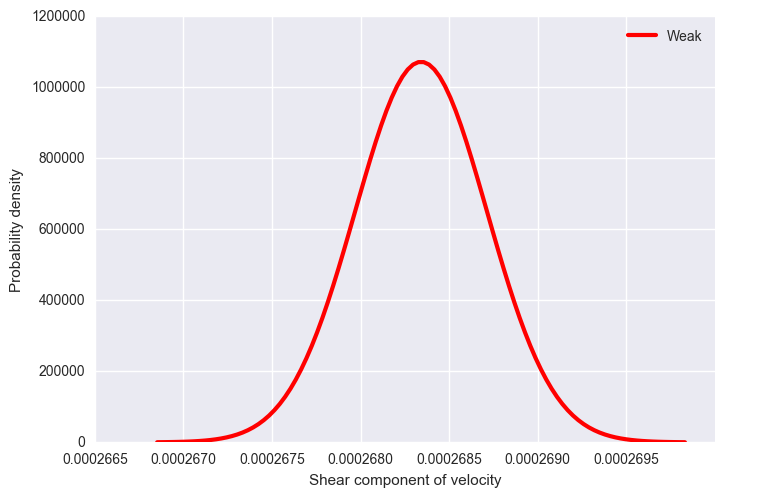

In [11]:
plt.plot(x_shear_weak, pdf_shear_weak, linewidth=3, color='r', label="Weak")
plt.legend()
plt.xlabel("Shear component of velocity")
plt.ylabel("Probability density")
plt.show()

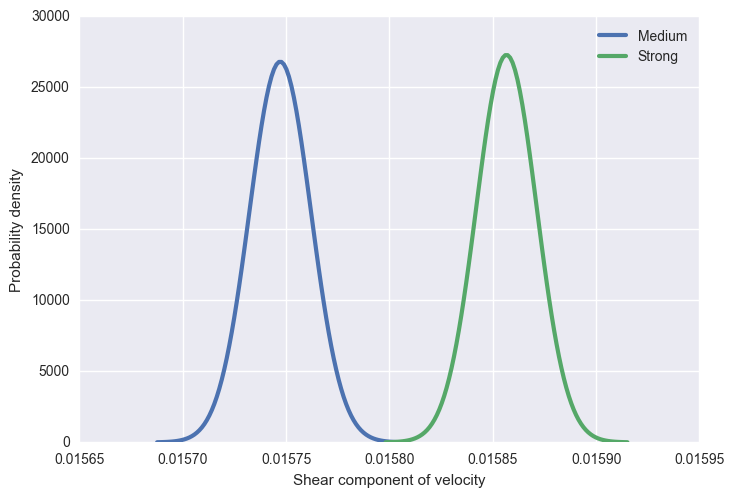

In [12]:
plt.plot(x_shear_med, pdf_shear_med, linewidth=3, label="Medium")
plt.plot(x_shear_strong, pdf_shear_strong, linewidth=3, label="Strong")
plt.legend()
plt.xlabel("Shear component of velocity")
plt.ylabel("Probability density")
plt.show()

## Mixture distribution of normal component of plate velocity

In [13]:
(x_normal_weak, pdf_normal_weak) = generate_mixture(v_normal_weak, v_normal_sig_weak)
(x_normal_med, pdf_normal_med) = generate_mixture(v_normal_med, v_normal_sig_med)
(x_normal_strong, pdf_normal_strong) = generate_mixture(v_normal_strong, v_normal_sig_strong)

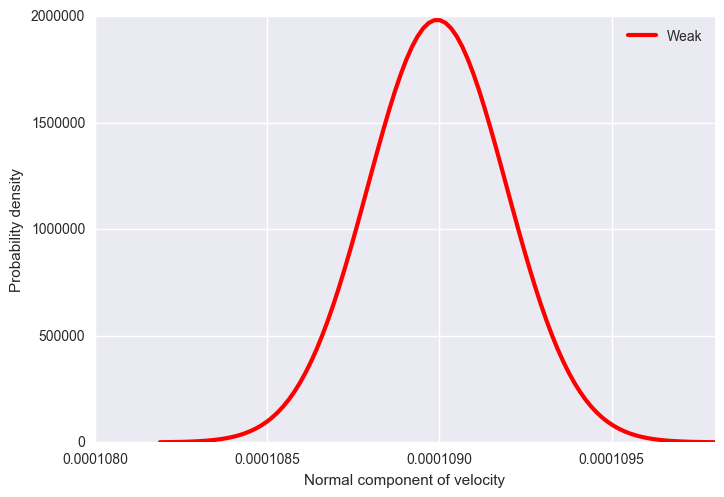

In [14]:
plt.plot(x_normal_weak, pdf_normal_weak, linewidth=3, color='r', label="Weak")
plt.legend()
plt.xlabel("Normal component of velocity")
plt.ylabel("Probability density")
plt.show()

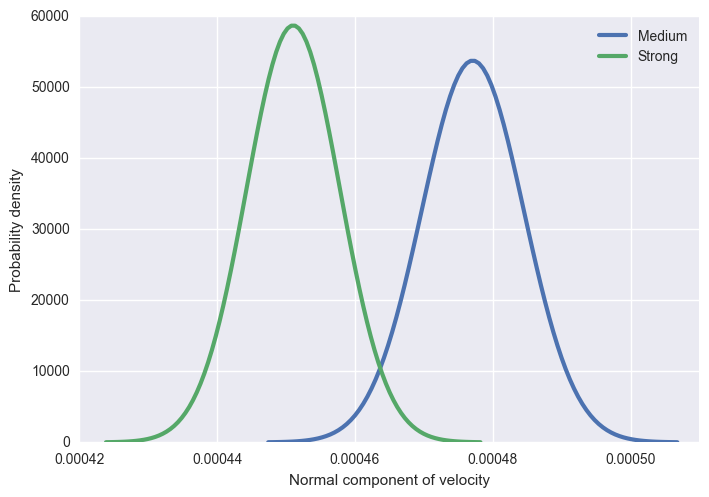

In [15]:
plt.plot(x_normal_med, pdf_normal_med, linewidth=3, label="Medium")
plt.plot(x_normal_strong, pdf_normal_strong, linewidth=3, label="Strong")
plt.legend()
plt.xlabel("Normal component of velocity")
plt.ylabel("Probability density")
plt.show()

## Joint mixture distribution

In [16]:
(x_grid_weak, y_grid_weak, pdf_joint_weak) = generate_2d_mixture(v_shear_weak, v_shear_sig_weak, v_normal_weak, v_normal_sig_weak, v_cov_weak)

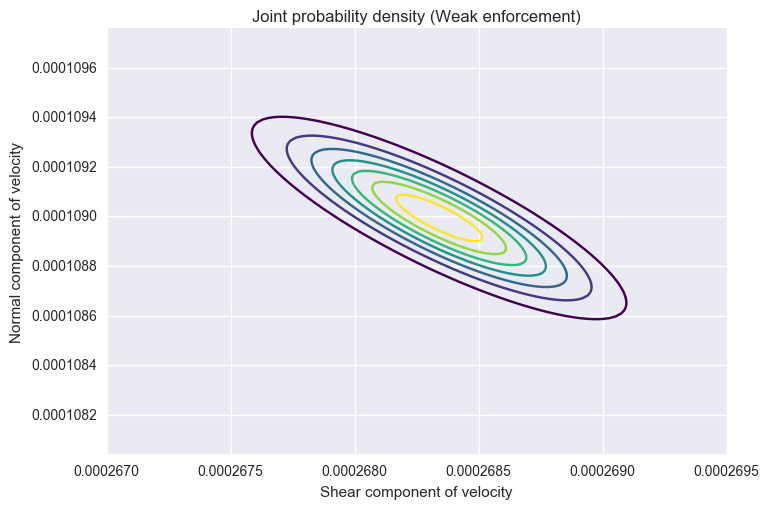

In [17]:
plt.contour(x_grid_weak, y_grid_weak, pdf_joint_weak, cmap='viridis')
plt.axis('equal')
plt.xlabel('Shear component of velocity')
plt.ylabel('Normal component of velocity')
plt.title("Joint probability density (Weak enforcement)")
plt.show()

In [18]:
(x_grid_med, y_grid_med, pdf_joint_med) = generate_2d_mixture(v_shear_med, v_shear_sig_med, v_normal_med, v_normal_sig_med, v_cov_med)

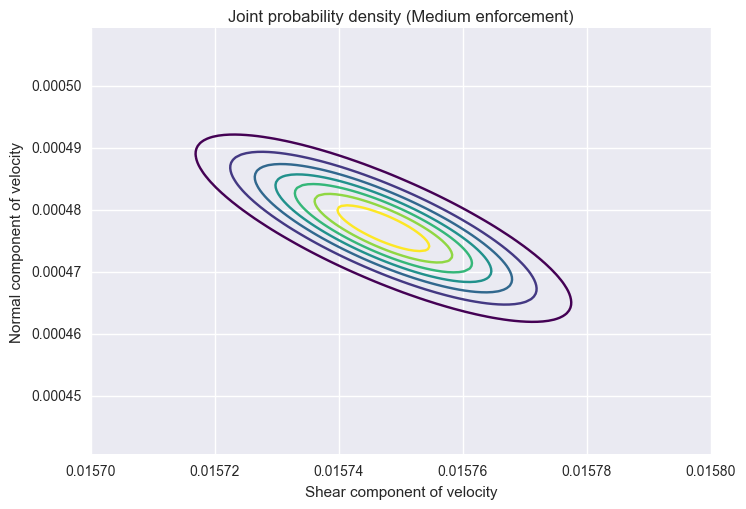

In [19]:
plt.contour(x_grid_med, y_grid_med, pdf_joint_med, cmap='viridis')
plt.axis('equal')
plt.xlabel('Shear component of velocity')
plt.ylabel('Normal component of velocity')
plt.title("Joint probability density (Medium enforcement)")
plt.show()

In [20]:
(x_grid_strong, y_grid_strong, pdf_joint_strong) = generate_2d_mixture(v_shear_strong, v_shear_sig_strong, v_normal_strong, v_normal_sig_strong, v_cov_strong)

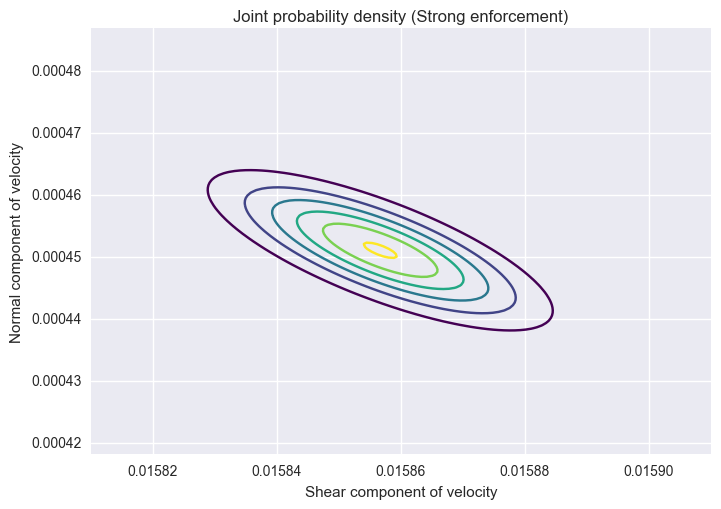

In [21]:
plt.contour(x_grid_strong, y_grid_strong, pdf_joint_strong, cmap='viridis')
plt.axis('equal')
plt.xlabel('Shear component of velocity')
plt.ylabel('Normal component of velocity')
plt.title("Joint probability density (Strong enforcement)")
plt.show()